## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

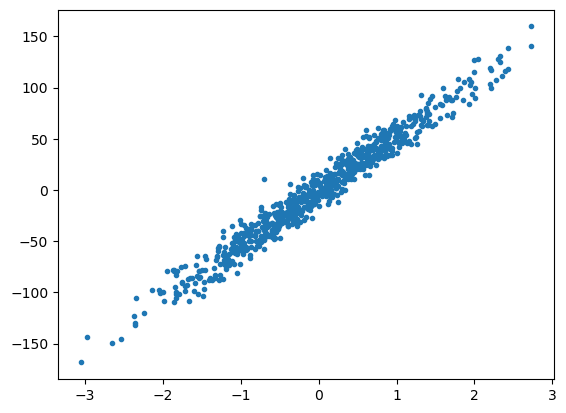

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
w = np.random.rand(2, 1)
lr = 0.1

x = x_train.reshape(x_train.size, -1)
temp = np.ones((x.size,1))
x = np.concatenate((temp,x), axis=1)
y = y_train.reshape(y_train.size, -1)
lossi = np.zeros((100,1))
for i in range(0, 100):
    
    y_ = x @ w
    
    dif = y_ - y
    loss = dif**2
    loss = loss.sum() / dif.size
    lossi[i,0] = loss
    gradient = x.T @ dif
    gradient = gradient * 2 / dif.size
    w = w - lr*gradient
    
    print(loss)
print(w)    

2638.1362964302725
1779.885696333217
1211.88680066272
835.9375992987519
587.0761859090528
422.32401524282244
313.2431893435348
241.0148007179144
193.18393323140515
161.50664193935594
140.52565401473248
126.62802710260385
117.42160410331545
111.32236662938395
107.28132505617178
104.60374105956711
102.82945440403566
101.65365215146404
100.87440797721322
100.35794332453024
100.01562162773772
99.78871139334953
99.63829379138579
99.53857723614311
99.47246847093689
99.42863829994177
99.39957741579289
99.38030814659953
99.3675307705308
99.35905776677919
99.35343886153875
99.34971250909132
99.34724116391044
99.34560208630334
99.34451495589256
99.34379388294218
99.34331559258123
99.34299833035263
99.34278787552022
99.34264826674588
99.34255565217573
99.34249421118196
99.34245344979006
99.34242640701862
99.34240846528594
99.34239656141665
99.34238866332616
99.34238342290891
99.34237994579377
99.3423776386144
99.3423761076947
99.34237509183939
99.342374417747
99.34237397043066
99.34237367359394
9

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

110.43819236616467


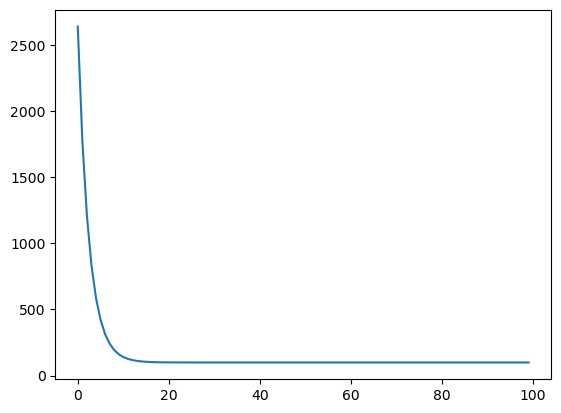

In [5]:
#y_pred = your_model(x_test)
#print(Mean_square_error(y_test, y_pred))
y_pred = x_test*w[1,0] + w[0,0]
y_test = y_test.reshape(y_test.size, -1)
mse = y_pred - y_test
mse = mse**2
mse = mse.sum() / mse.size
print(mse)
a = np.arange(100).reshape(100,1)
plt.plot(a, lossi)

# Part 2. Logistic regreesion model

## Load classification data

In [6]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

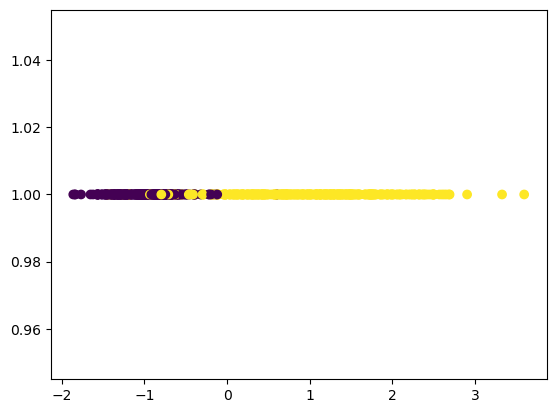

In [7]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [8]:
w = np.random.rand(2, 1)
lr = 10

x = x_train.reshape(x_train.size, -1)
temp = np.ones((x.size,1))
x = np.concatenate((temp,x), axis=1)
y = y_train.reshape(y_train.size, -1)
lossi = np.zeros((100,1))
for i in range(0, 100):
    z = x @ w
    z = -z
    z = np.exp(z)
    z = z + 1
    z = 1.0 / z
    
    
    lossa = -(y*np.log(z)).sum()
    lossb = -((1-y)*np.log(1-z)).sum()
    loss = lossa + lossb
    loss = loss / z.size
    lossi[i,0] = loss
    
    dif = z - y
    gradient = x.T @ dif
    gradient = gradient / z.size
    w = w - lr*gradient
    print(loss)
    
print(w)    

0.5097138799155148
0.23580412887513819
0.18853233986898552
0.17918857723712486
0.1770636189483884
0.17580350585382964
0.1748427408508779
0.1740872541285688
0.17348407395660292
0.17299663672992585
0.1725987386739579
0.1722711432433651
0.17199944499207387
0.1717726720196855
0.1715823447249885
0.1714218259641663
0.1712858626023539
0.1711702558922052
0.17107162046196778
0.17098720543340623
0.17091475985825208
0.17085243026063798
0.17079868176581245
0.17075223677775686
0.17071202686590406
0.17067715470044445
0.17064686370679985
0.1706205137033527
0.1705975612155542
0.17057754347319865
0.17056006532938356
0.1705447885125509
0.17053142275315208
0.17051971842529798
0.17050946041938025
0.1705004630199665
0.17049256560855378
0.17048562904616102
0.17047953261858245
0.17047417144915325
0.1704694543014071
0.17046530170802437
0.17046164437374137
0.17045842180899393
0.17045558115845677
0.17045307619465716
0.1704508664517697
0.17044891647874189
0.17044719519423696
0.17044567532864152
0.170444332940673

0.18895643998425926


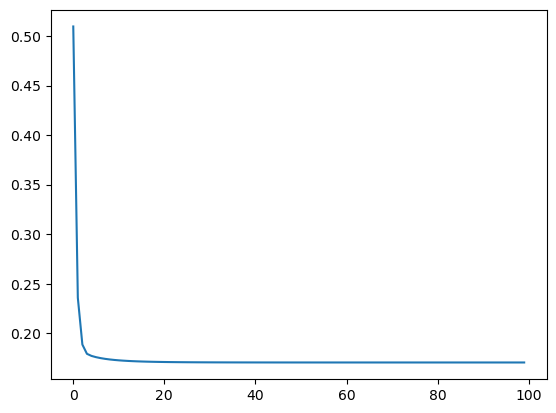

In [9]:
y_pred = x_test*w[1,0] + w[0,0]
y_test = y_test.reshape(y_test.size, -1)
y_pred = np.exp(-y_pred)
y_pred = 1.0 / (y_pred+1)

lossa = -(y_test*np.log(y_pred))
lossb = -((1-y_test)*np.log(1-y_pred))
ce = lossa.sum()/lossa.size + lossb.sum()/lossb.size
print(ce)
a = np.arange(100).reshape(100,1)
plt.plot(a, lossi)